# Conditional GAN
    В данной заметке мы построим модель Conditional GAN. 
    Такой подход позволяет генерировать изображения, которые соответствуют определенному классу.

# Подключение необходимых модулей

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import Subset

import matplotlib.pyplot as plt
%matplotlib inline

from CondGANcfg import device, BATCH, WORKERS, EPOCHS
from CondGAN import DiscriminatorForMNIST, Generator, train_GAN

print(f'Selected device is {device}')

Selected device is cuda:0


# Загрузка датасета MNIST

In [2]:
dataset = MNIST(root='.', transform=transforms.ToTensor(), download=True)
dataloader = DataLoader(dataset=dataset, batch_size=BATCH, shuffle=True, num_workers=WORKERS )

## Изобразим 16 случайных изображений из выборки

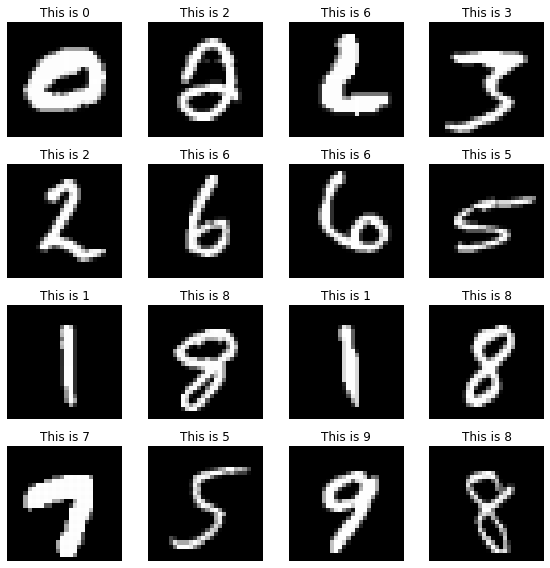

In [3]:
images, labels = next(iter(dataloader))
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'This is {labels[i]}')
plt.tight_layout()
plt.show()

# Conditional GAN на датасете MNIST

## Определение модели

In [9]:
discriminator = DiscriminatorForMNIST().to(device)
generator = Generator().to(device)

adversarial_criterion = nn.MSELoss()
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

## Цикл обучения

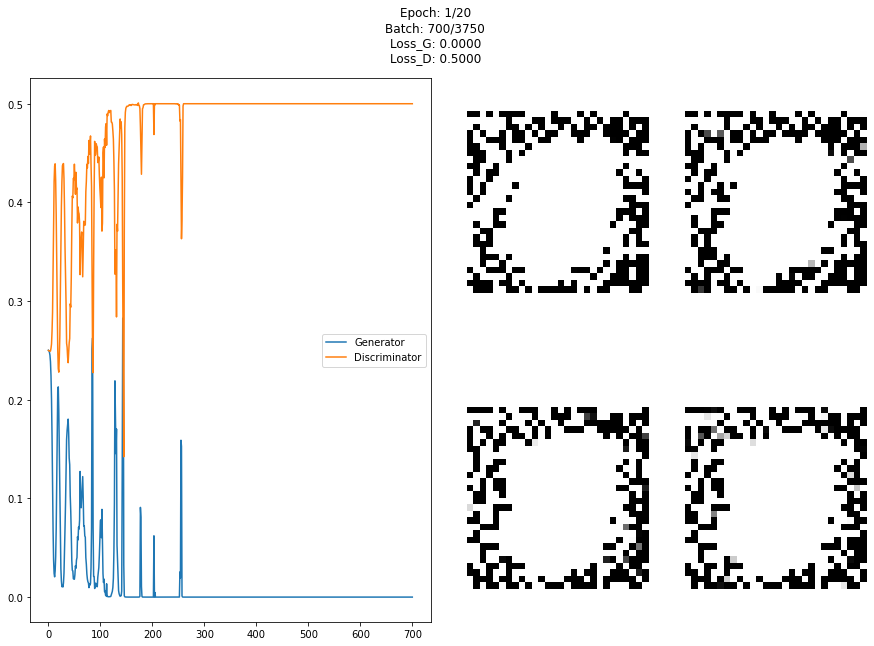

KeyboardInterrupt: 

In [10]:
train_GAN(discriminator, generator, nn.MSELoss(), EPOCHS, BATCH, device, dataloader, discriminator_optimizer, generator_optimizer)

Сохраним веса модели

In [12]:
# save state_dict of generator
torch.save(generator.state_dict(), 'cond_generator.pth')

## Визуализация 100 результатов семплирования из гауссовского шума

Загрузка весов генератора

In [5]:
netG = Generator().to(device)
netG.load_state_dict(torch.load('conv_generator.pth'))

<All keys matched successfully>

# Вывод
    Все странно
   